In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

In [6]:
nosPokemons = pd.read_csv("datas/pokedex.csv")
# print(nosPokemons.columns.values)
# print(nosPokemonsClean.head(10))

In [7]:
nosPokemonsClean = nosPokemons
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("VRAI", 1)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].replace("FAUX", 0)
nosPokemonsClean["LEGENDAIRE"] = nosPokemonsClean["LEGENDAIRE"].astype(int)


In [8]:
print(nosPokemonsClean.shape)


(800, 12)


In [9]:
print(nosPokemonsClean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOM                      800 non-null    object
 2   TYPE_1                   800 non-null    object
 3   TYPE_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   NIVEAU_ATTAQUE           800 non-null    int64 
 6   NIVEAU_DEFENSE           800 non-null    int64 
 7   NIVEAU_ATTAQUE_SPECIALE  800 non-null    int64 
 8   NIVEAU_DEFENSE_SPECIALE  800 non-null    int64 
 9   VITESSE                  800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDAIRE               800 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 75.1+ KB
None


In [10]:
print(nosPokemonsClean[nosPokemonsClean['NOM'].isnull()])

Empty DataFrame
Columns: [NUMERO, NOM, TYPE_1, TYPE_2, POINTS_DE_VIE, NIVEAU_ATTAQUE, NIVEAU_DEFENSE, NIVEAU_ATTAQUE_SPECIALE, NIVEAU_DEFENSE_SPECIALE, VITESSE, NOMBRE_GENERATIONS, LEGENDAIRE]
Index: []


In [11]:
print(nosPokemonsClean['NOM'][61])
print(nosPokemonsClean['NOM'][63])

Ferosinge
Caninos


In [12]:
nosPokemonsClean['NOM'][62] = "Colossinge"

/tmp/ipykernel_2776/1625631107.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  nosPokemonsClean['NOM'][62] = "Colossinge"
/tmp/ipykernel_2776/1625631107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [13]:
print(nosPokemonsClean['NOM'][62])

Colossinge


In [ ]:


combats = pd.read_csv("datas/combats.csv")
print(combats.columns.values)
print("------------------------------")
print(combats.head(10))
print("------------------------------")
print(combats.shape)
print("------------------------------")
print(combats.info())
print("------------------------------")

['Premier_Pokemon' 'Second_Pokemon' 'Pokemon_Gagnant']
   Premier_Pokemon  Second_Pokemon  Pokemon_Gagnant
0              266             298              298
1              702             701              701
2              191             668              668
3              237             683              683
4              151             231              151
5              657             752              657
6              192             134              134
7               73             545              545
8              220             763              763
9              302              31               31
(50000, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Premier_Pokemon  50000 non-null  int64
 1   Second_Pokemon   50000 non-null  int64
 2   Pokemon_Gagnant  50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1

In [ ]:
nosPokemons = pd.read_csv("datas/pokedex.csv")
combats = pd.read_csv("datas/combats.csv")

In [ ]:
nbFoisPremierPosition = combats.groupby('Premier_Pokemon').count()
print(nbFoisPremierPosition)

In [ ]:
nbFoisSecondPosition = combats.groupby('Second_Pokemon').count()
print(nbFoisSecondPosition)

In [ ]:
nombreTotalDeCombats = nbFoisPremierPosition + nbFoisSecondPosition
print(nombreTotalDeCombats)

In [ ]:
nombreDeVictoires = combats.groupby('Pokemon_Gagnant').count()
print(nombreDeVictoires)

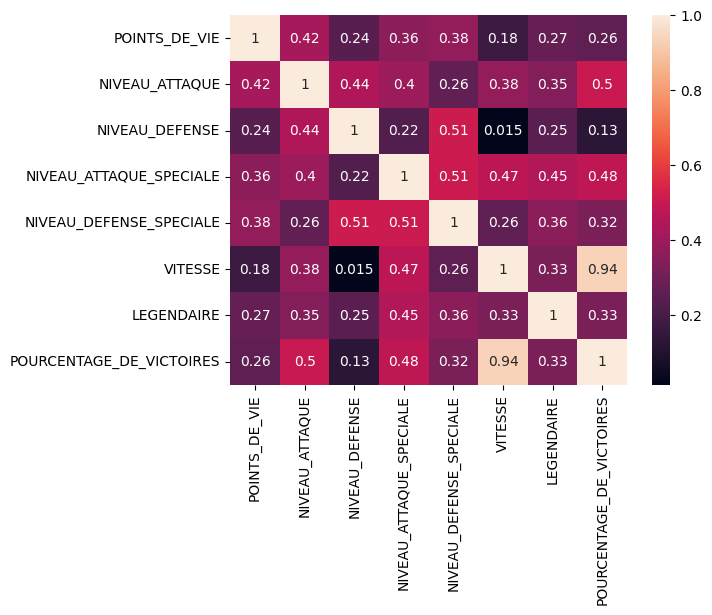

In [ ]:
listeAAgreger = combats.groupby('Pokemon_Gagnant').count()
listeAAgreger = listeAAgreger.sort_index()

listeAAgreger['NBR_COMBATS'] = nbFoisPremierPosition.Pokemon_Gagnant + nbFoisSecondPosition.Pokemon_Gagnant

listeAAgreger['NBR_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon

listeAAgreger['POURCENTAGE_DE_VICTOIRES'] = nombreDeVictoires.Premier_Pokemon / (nbFoisPremierPosition.Pokemon_Gagnant + nbFoisSecondPosition.Pokemon_Gagnant)

print(listeAAgreger)

In [ ]:

nouveauPokedex = nosPokemonsClean.merge(listeAAgreger, left_on='NUMERO', right_index= True, how='left')
print(nouveauPokedex.describe())

Partie 2

In [ ]:
print(nouveauPokedex.describe())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

axe_X = sns.countplot(x="TYPE_1", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_1')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_1")
plt.show()

In [ ]:

axe_X = sns.countplot(x="TYPE_2", hue="LEGENDAIRE", data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_2')
plt.ylabel('Total')
plt.title("POKEMONS DE TYPE_2")
plt.show()

In [ ]:
print(nouveauPokedex.groupby('TYPE_1').agg({"POURCENTAGE_DE_VICTOIRES": "mean"}).sort_values(by="POURCENTAGE_DE_VICTOIRES"))


In [ ]:
corr = nouveauPokedex.loc[:,['POINTS_DE_VIE','NIVEAU_ATTAQUE','NIVEAU_DEFENSE','NIVEAU_ATTAQUE_SPECIALE','NIVEAU_DEFENSE_SPECIALE','VITESSE', 'LEGENDAIRE', 'POURCENTAGE_DE_VICTOIRES']].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

In [ ]:
dataset=nouveauPokedex
dataset.to_csv("datas/dataset.csv", sep='\t')